EJERCICIO N°1

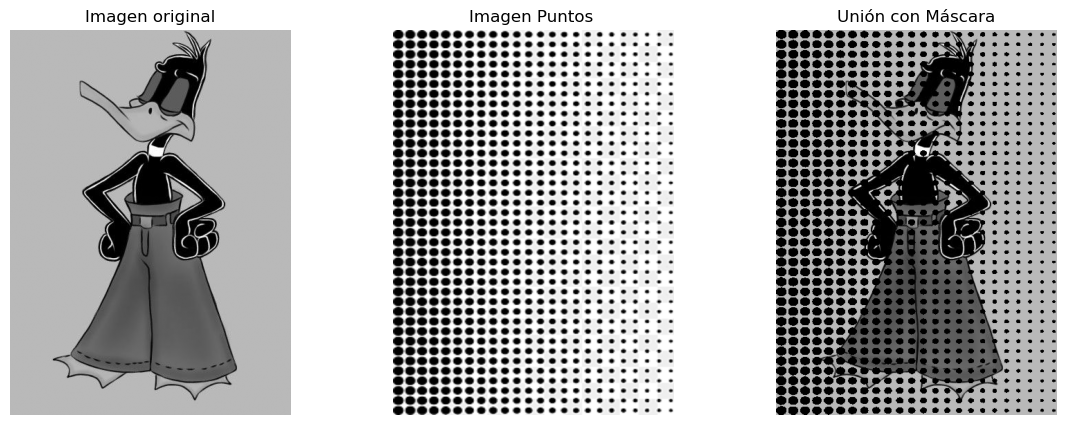

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('pato.jpg')
imgpuntos = cv2.imread('puntos.png')

img_Ori = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_Pun = cv2.cvtColor(imgpuntos, cv2.COLOR_BGR2GRAY)

if img.shape[:2] != imgpuntos.shape[:2]:
    imgpuntos = cv2.resize(imgpuntos, (img.shape[1], img.shape[0]))

img_Ori_3C = cv2.merge([img_Ori, img_Ori, img_Ori])
_, binarizada = cv2.threshold(img_Pun, 127, 255, cv2.THRESH_BINARY_INV)

binCanales = cv2.merge([binarizada, binarizada, binarizada])

puntos_color = np.zeros_like(img)
puntos_sobreI = np.where(binCanales == 255, puntos_color, img_Ori_3C)

plt.figure(figsize=(14, 5))

plt.subplot(131)
plt.imshow(img_Ori, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_Pun, cmap='gray')
plt.title('Imagen Puntos ')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(puntos_sobreI, cv2.COLOR_BGR2RGB))
plt.title('Unión con Máscara')
plt.axis('off')

plt.show()


EJERCICIO N°2

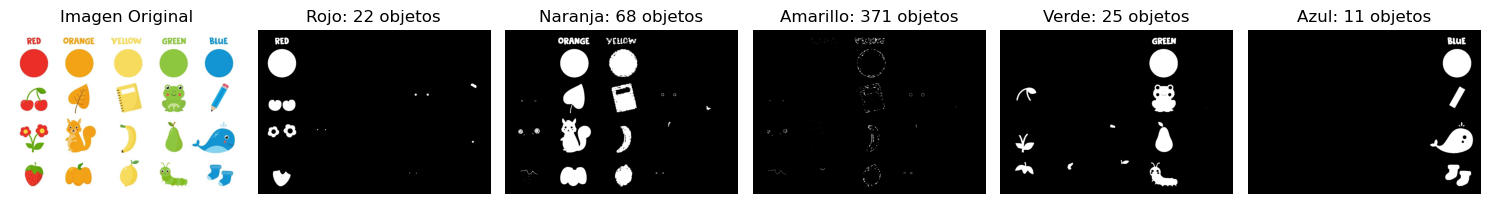

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

COLOR_RANGES = {
    'Rojo': [((0, 70, 50), (10, 255, 255)), ((170, 70, 50), (180, 255, 255))],  
    'Naranja': [((10, 70, 50), (25, 255, 255))],  
    'Amarillo': [((26, 70, 50), (35, 255, 255))],  
    'Verde': [((36, 50, 70), (89, 255, 255))],  
    'Azul': [((90, 50, 70), (128, 255, 255))]  
}

def contar_por_color(img, color_ranges):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    resultados = {}

    for color, ranges in color_ranges.items():
        mask_total = np.zeros(hsv.shape[:2], dtype=np.uint8)
        for lower, upper in ranges:
            mask = cv2.inRange(hsv, np.array(lower), np.array(upper))
            mask_total = cv2.bitwise_or(mask_total, mask)

        # Etiquetado de los objetos
        etiquetas = measure.label(mask_total, connectivity=2)
        conteo = np.max(etiquetas)
        resultados[color] = (conteo, mask_total)

    return resultados

imagen = cv2.imread('colores.jpg')  
conteos = contar_por_color(imagen, COLOR_RANGES)

plt.figure(figsize=(15, 10))
plt.subplot(1, len(conteos) + 1, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Cada color y su conteo
for i, (color, (conteo, mascara)) in enumerate(conteos.items(), start=2):
    plt.subplot(1, len(conteos) + 1, i)
    plt.title(f'{color}: {conteo} objetos')
    plt.imshow(mascara, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


EJERCICIO N°3

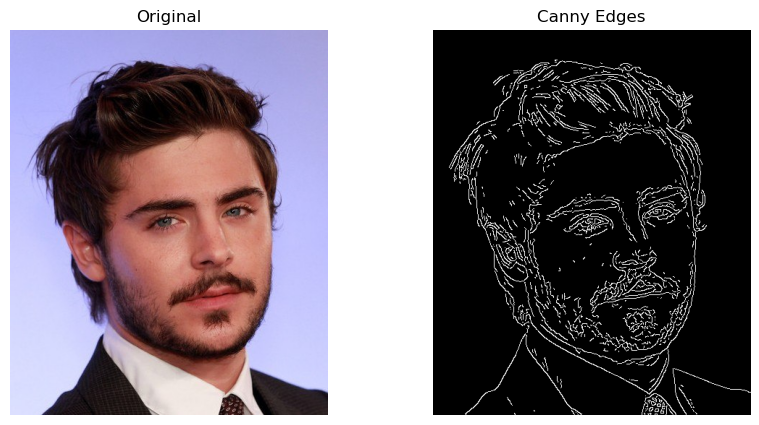

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rostro2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Desenfoque
blur = cv2.GaussianBlur(gray, (5, 5), 0,9)
#Deteccion de bordes con Canny
edges = cv2.Canny(blur, threshold1=55, threshold2=45)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()